In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure plots appear inside the notebook
%matplotlib inline

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [10]:
# Load the dataset
df = pd.read_csv('food_coded.csv')

# View dataset structure
print("--- Dataset Info ---")
df.info()

print("\n--- First 5 Rows ---")
display(df.head())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null 

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [11]:
# 1. Convert 'GPA' to numeric, turning errors into NaNs (missing values)
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')

# 2. Convert 'weight' to numeric
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')

# 3. Check for missing values in these critical columns
print("Missing values after cleaning:")
print(df[['GPA', 'weight']].isnull().sum())

# Optional: Drop rows where these specific values are missing for better analysis
df_clean = df.dropna(subset=['GPA', 'weight'])
print(f"\nRows remaining after cleaning: {df_clean.shape[0]}")

Missing values after cleaning:
GPA       5
weight    5
dtype: int64

Rows remaining after cleaning: 115


In [12]:
# Summary statistics for key numerical columns
# We look at GPA, Weight, and Cooking Frequency (cook)
stats = df_clean[['GPA', 'weight', 'cook', 'eating_out']].describe()

print("Statistical Summary:")
display(stats)

Statistical Summary:


,GPA,weight,cook,eating_out
count,115.000000,115.000000,112.000000,115.000000
mean,3.423104,157.886957,2.794643,2.556522
std,0.391963,31.132080,1.005735,1.156153
min,2.200000,100.000000,1.000000,1.000000
25%,3.200000,135.000000,2.000000,2.000000
50%,3.500000,155.000000,3.000000,2.000000
75%,3.700000,177.500000,3.000000,3.000000
max,4.000000,265.000000,5.000000,5.000000


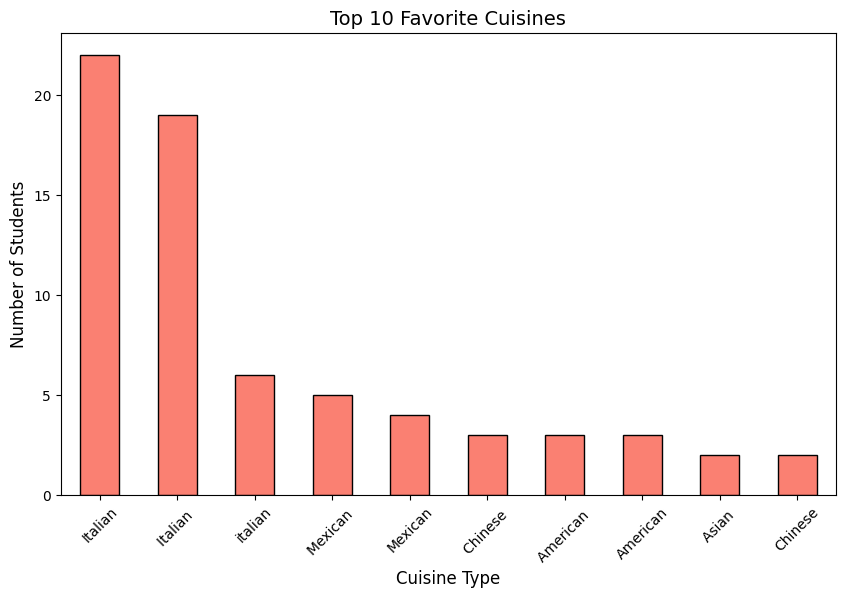

In [13]:
# Count the occurrences of each cuisine
cuisine_counts = df['fav_cuisine'].value_counts().head(10) # Top 10 cuisines

# Plotting
plt.figure(figsize=(10,6))
cuisine_counts.plot(kind='bar', color='salmon', edgecolor='black')

plt.title('Top 10 Favorite Cuisines', fontsize=14)
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=45)
plt.show()

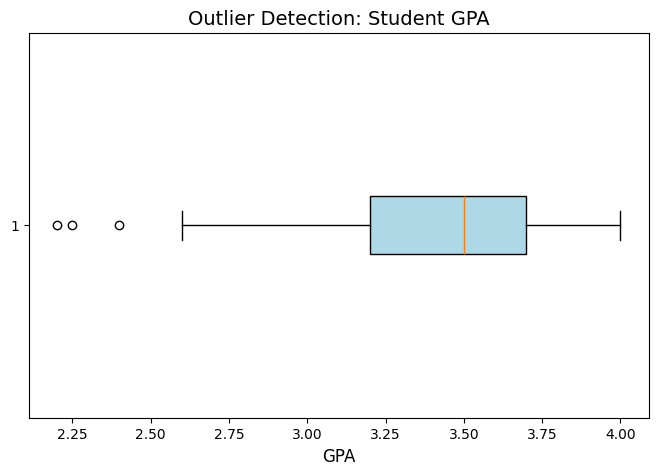

In [14]:
# Box Plot for GPA
plt.figure(figsize=(8,5))
plt.boxplot(df_clean['GPA'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))

plt.title('Outlier Detection: Student GPA', fontsize=14)
plt.xlabel('GPA', fontsize=12)
plt.show()

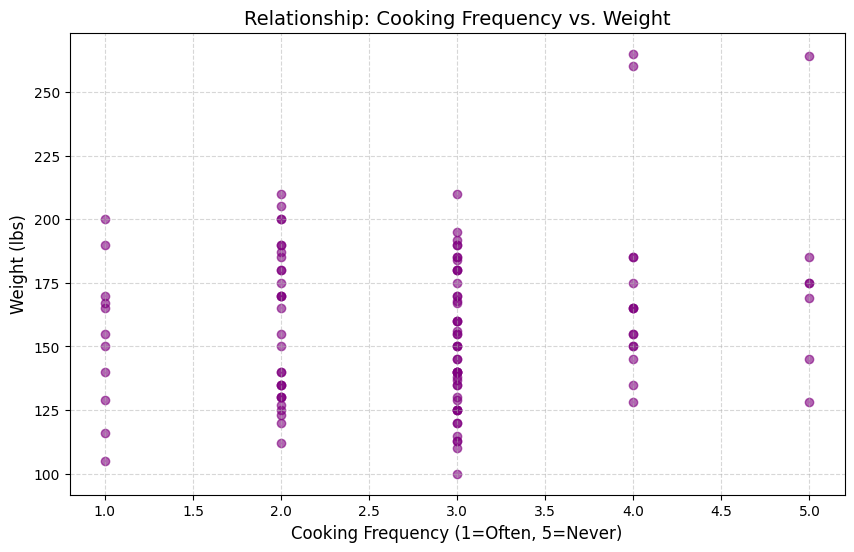

In [15]:
# Scatter plot: Weight vs. Cooking Frequency
# Note: 'cook' is coded (1=Every day, 5=Never)
plt.figure(figsize=(10,6))
plt.scatter(df_clean['cook'], df_clean['weight'], alpha=0.6, color='purple')

plt.title('Relationship: Cooking Frequency vs. Weight', fontsize=14)
plt.xlabel('Cooking Frequency (1=Often, 5=Never)', fontsize=12)
plt.ylabel('Weight (lbs)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()